In [3]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [4]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_ComplexPie/'

In [5]:
final_df=pd.read_csv('ComplexPie_MS_PerStep.csv')

In [6]:
filtered_poursyrup = final_df[final_df['Step'].str.strip() == 'Pour syrup']
filtered_poursyrup

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
8,C001,36,Pour syrup,131.559940,219.383012,243.410276,230.412376,263.878853,310.688388,0.000000,0.000000
19,C003,58,Pour syrup,305.505264,479.528576,429.275107,315.347577,553.793043,524.247051,377.615177,338.691752
30,C006,42,Pour syrup,0.000000,132.312614,0.000000,0.000000,150.402195,226.747147,0.000000,0.000000
41,C008,34,Pour syrup,195.377408,263.319124,256.843596,253.717914,290.983899,399.257787,330.720404,316.063602
52,C009,24,Pour syrup,94.413539,163.770799,166.705077,154.378053,192.135676,375.831706,228.019399,174.918945
63,C012,54,Pour syrup,118.625608,152.790924,164.978799,131.646900,142.912458,397.134531,320.450419,210.551063
74,C013,48,Pour syrup,216.891218,265.620868,293.155047,266.067193,319.389614,464.979191,395.509451,321.385721
85,C016,39,Pour syrup,98.417169,201.276142,178.119322,150.699296,235.170484,318.691626,212.242779,172.146797
96,C017,36,Pour syrup,0.000000,184.569689,0.000000,97.655706,145.496436,333.731828,276.808112,213.184792
107,C020,30,Pour syrup,109.345891,182.016561,158.765160,126.914372,310.721249,388.566801,266.477279,198.197128


In [7]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_poursyrup = filtered_poursyrup.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_poursyrup.select_dtypes(include=['float64', 'int64']).columns
filtered_poursyrup[numerical_cols] = filtered_poursyrup[numerical_cols].replace(0, np.nan)

filtered_poursyrup[numerical_cols] = imputer.fit_transform(filtered_poursyrup[numerical_cols])
filtered_poursyrup

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
8,C001,36.0,Pour syrup,131.559940,219.383012,243.410276,230.412376,263.878853,310.688388,212.242779,172.146797
19,C003,58.0,Pour syrup,305.505264,479.528576,429.275107,315.347577,553.793043,524.247051,377.615177,338.691752
30,C006,42.0,Pour syrup,109.338433,132.312614,183.368921,185.855039,150.402195,226.747147,223.311778,199.858685
41,C008,34.0,Pour syrup,195.377408,263.319124,256.843596,253.717914,290.983899,399.257787,330.720404,316.063602
52,C009,24.0,Pour syrup,94.413539,163.770799,166.705077,154.378053,192.135676,375.831706,228.019399,174.918945
63,C012,54.0,Pour syrup,118.625608,152.790924,164.978799,131.646900,142.912458,397.134531,320.450419,210.551063
74,C013,48.0,Pour syrup,216.891218,265.620868,293.155047,266.067193,319.389614,464.979191,395.509451,321.385721
85,C016,39.0,Pour syrup,98.417169,201.276142,178.119322,150.699296,235.170484,318.691626,212.242779,172.146797
96,C017,36.0,Pour syrup,118.625608,184.569689,164.978799,97.655706,145.496436,333.731828,276.808112,213.184792
107,C020,30.0,Pour syrup,109.345891,182.016561,158.765160,126.914372,310.721249,388.566801,266.477279,198.197128


In [8]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Syrup',
    'HeadCamera Distance': 'HeadCamera Distance - Add Syrup',
    'LeftElbow Distance': 'LeftElbow Distance - Add Syrup',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Syrup',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Syrup',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Syrup',
    'RightElbow Distance': 'RightElbow Distance - Add Syrup',
    'RightShoulder Distance': 'RightShoulder Distance - Add Syrup'
}

# Rename columns
filtered_poursyrup = filtered_poursyrup.rename(columns=new_column_names)
filtered_poursyrup

,Participant,Block Design Raw Score,Step,Chest Distance - Add Syrup,HeadCamera Distance - Add Syrup,LeftElbow Distance - Add Syrup,LeftShoulder Distance - Add Syrup,MotionControllerLeft Distance - Add Syrup,MotionControllerRight Distance - Add Syrup,RightElbow Distance - Add Syrup,RightShoulder Distance - Add Syrup
8,C001,36.0,Pour syrup,131.559940,219.383012,243.410276,230.412376,263.878853,310.688388,212.242779,172.146797
19,C003,58.0,Pour syrup,305.505264,479.528576,429.275107,315.347577,553.793043,524.247051,377.615177,338.691752
30,C006,42.0,Pour syrup,109.338433,132.312614,183.368921,185.855039,150.402195,226.747147,223.311778,199.858685
41,C008,34.0,Pour syrup,195.377408,263.319124,256.843596,253.717914,290.983899,399.257787,330.720404,316.063602
52,C009,24.0,Pour syrup,94.413539,163.770799,166.705077,154.378053,192.135676,375.831706,228.019399,174.918945
63,C012,54.0,Pour syrup,118.625608,152.790924,164.978799,131.646900,142.912458,397.134531,320.450419,210.551063
74,C013,48.0,Pour syrup,216.891218,265.620868,293.155047,266.067193,319.389614,464.979191,395.509451,321.385721
85,C016,39.0,Pour syrup,98.417169,201.276142,178.119322,150.699296,235.170484,318.691626,212.242779,172.146797
96,C017,36.0,Pour syrup,118.625608,184.569689,164.978799,97.655706,145.496436,333.731828,276.808112,213.184792
107,C020,30.0,Pour syrup,109.345891,182.016561,158.765160,126.914372,310.721249,388.566801,266.477279,198.197128


In [9]:
tracker_columns = ['Chest Distance - Add Syrup', 'HeadCamera Distance - Add Syrup', 'LeftElbow Distance - Add Syrup', 'LeftShoulder Distance - Add Syrup',
                   'RightElbow Distance - Add Syrup', 'RightShoulder Distance - Add Syrup', 'MotionControllerLeft Distance - Add Syrup',
                   'MotionControllerRight Distance - Add Syrup']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_poursyrup, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_poursyrup[block_design_col], filtered_poursyrup[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_poursyrup, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Syrup,0.560237,0.024001
1,HeadCamera Distance - Add Syrup,0.426256,0.099688
2,LeftElbow Distance - Add Syrup,0.079764,0.769032
3,LeftShoulder Distance - Add Syrup,0.042067,0.877070
4,RightElbow Distance - Add Syrup,0.564255,0.022796
5,RightShoulder Distance - Add Syrup,0.595274,0.014985
6,MotionControllerLeft Distance - Add Syrup,0.036873,0.892158
7,MotionControllerRight Distance - Add Syrup,0.587023,0.016820


In [10]:
#filtered_poursyrup.to_csv('ComplexPie_PourSyrup.csv',index=False)

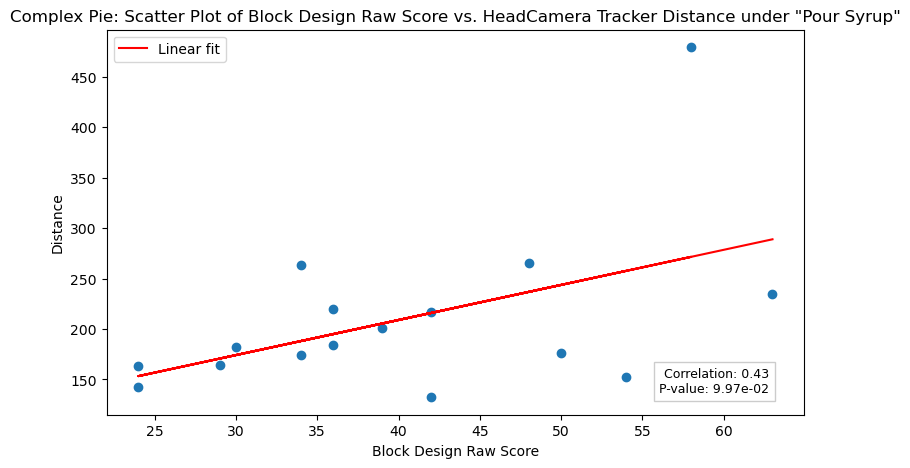

In [11]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['HeadCamera Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['HeadCamera Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['HeadCamera Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '57 CP_SyrupDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

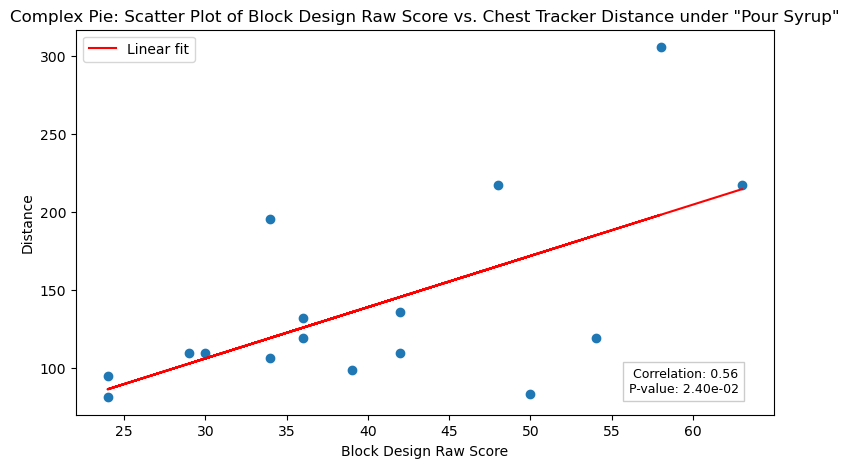

In [12]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['Chest Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['Chest Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['Chest Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '58 CP_SyrupDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

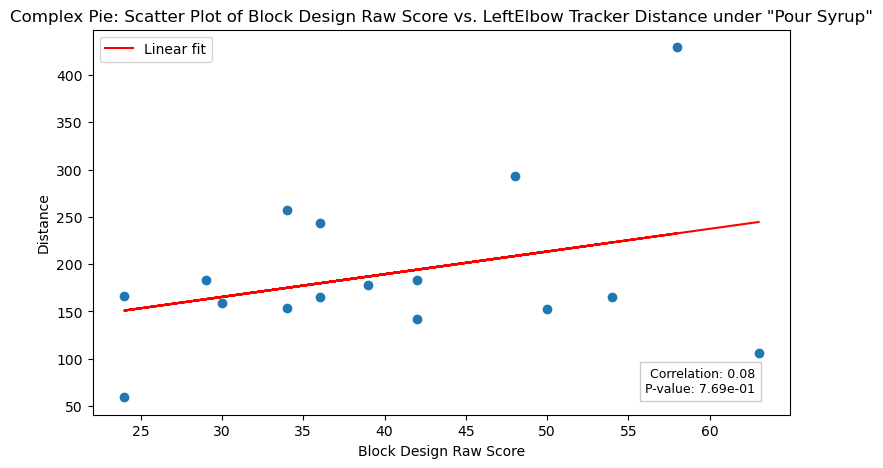

In [13]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftElbow Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftElbow Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftElbow Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '59 CP_SyrupDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

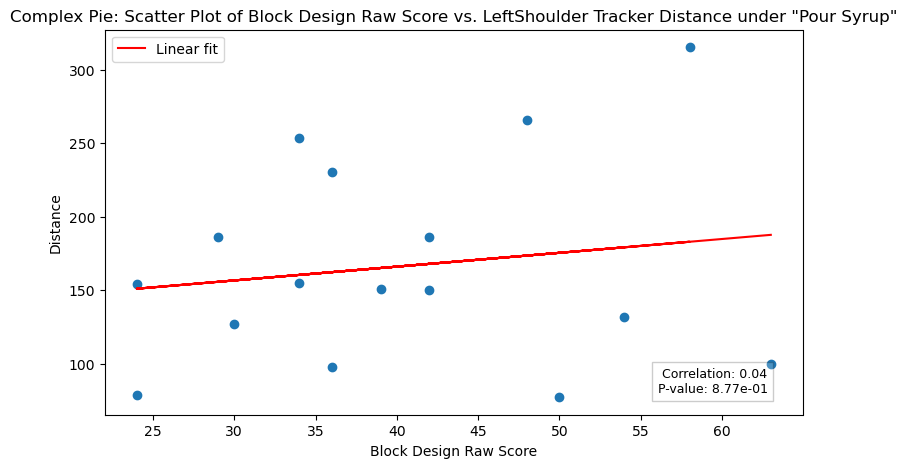

In [14]:
from scipy.stats import spearmanr
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftShoulder Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftShoulder Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['LeftShoulder Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '60 CP_SyrupDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

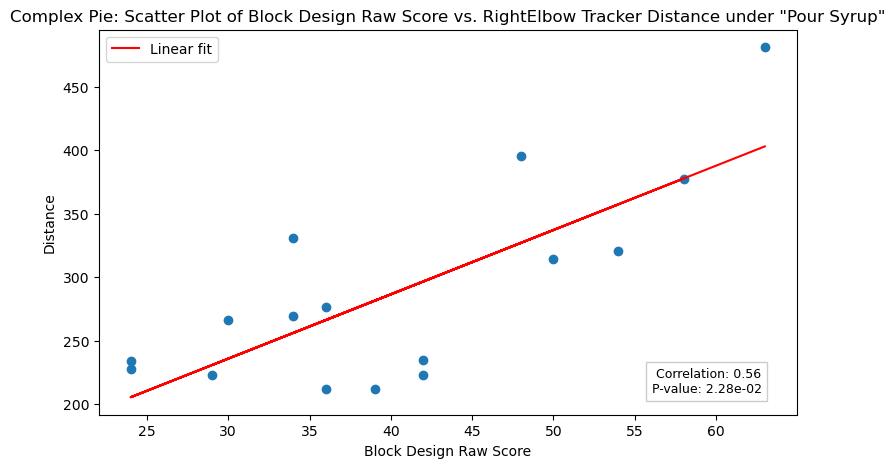

In [15]:
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightElbow Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightElbow Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightElbow Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '61 CP_SyrupDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

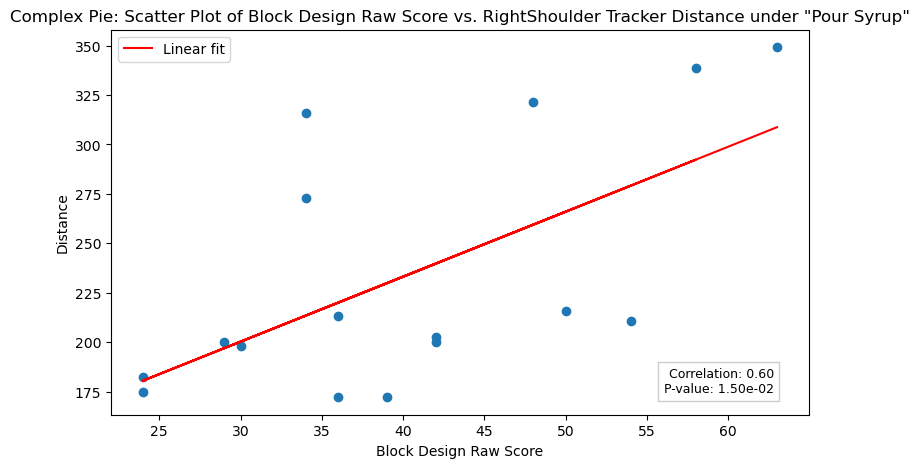

In [16]:
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightShoulder Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightShoulder Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['RightShoulder Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '62 CP_SyrupDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

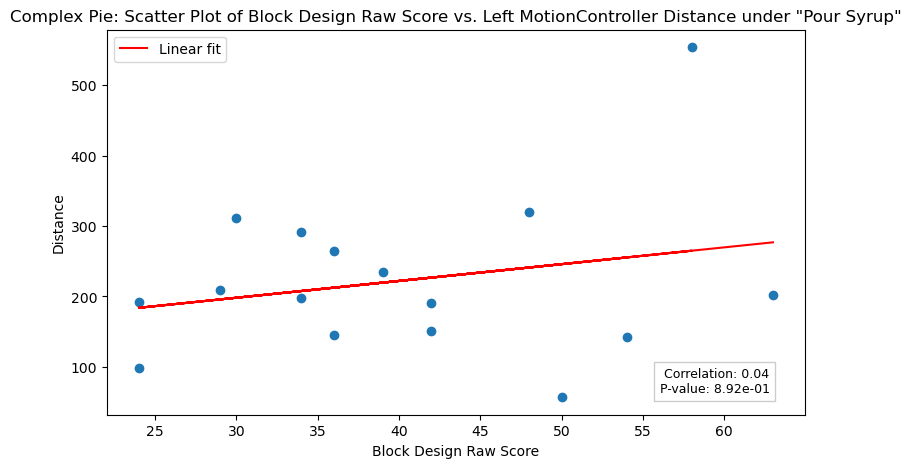

In [17]:
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerLeft Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerLeft Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerLeft Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '63 CP_SyrupDistanceLeftContlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

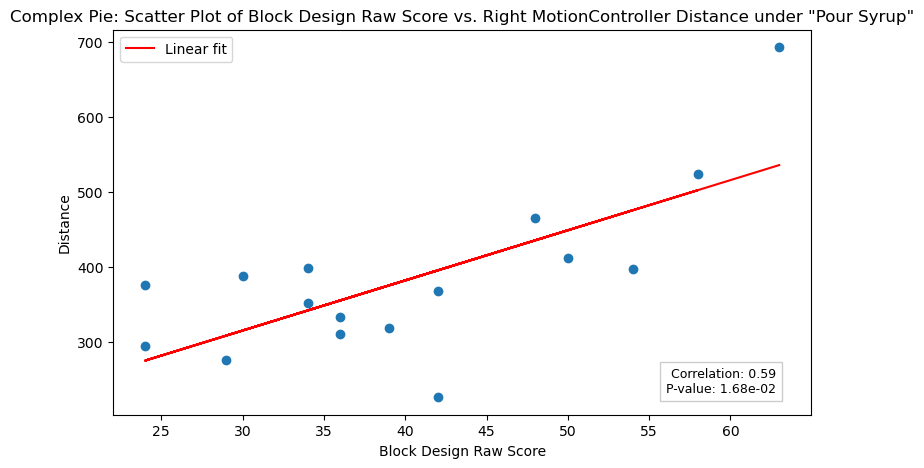

In [18]:
correlation, p_value = spearmanr(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerRight Distance - Add Syrup'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerRight Distance - Add Syrup'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_poursyrup['Block Design Raw Score'], filtered_poursyrup['MotionControllerRight Distance - Add Syrup'], 1)
fit_line = slope * filtered_poursyrup['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_poursyrup['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Complex Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Pour Syrup"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_ComplexPie')


file_path = os.path.join(folder_path, '64 CP_SyrupDistanceRightContlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()